In [396]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import textract
import urllib.request
import re
import os

%matplotlib inline

In [2]:
URL = "https://www.chesapeakebay.net/what/agenda/All/2008/02"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

In [12]:
results = soup.find(id="agenda")

In [21]:
results.find_all("h3")

[<h3 class="top-margin-20" id="7">Thursday, February 7, 2008</h3>,
 <h3 class="top-margin-20" id="11">Monday, February 11, 2008</h3>,
 <h3 class="top-margin-20" id="13">Wednesday, February 13, 2008</h3>,
 <h3 class="top-margin-20" id="14">Thursday, February 14, 2008</h3>,
 <h3 class="top-margin-20" id="19">Tuesday, February 19, 2008</h3>,
 <h3 class="top-margin-20" id="20">Wednesday, February 20, 2008</h3>,
 <h3 class="top-margin-20" id="21">Thursday, February 21, 2008</h3>,
 <h3 class="top-margin-20" id="22">Friday, February 22, 2008</h3>,
 <h3 class="top-margin-20" id="27">Wednesday, February 27, 2008</h3>,
 <h3 class="top-margin-20" id="28">Thursday, February 28, 2008</h3>]

In [23]:
#Meeting names
mtgs = results.find_all("h4")
mtgs

[<h4 class="h3 normal-weight">Reevaluation Technical Workgroup Conference Call</h4>,
 <h4 class="h3 normal-weight">TMAW meeting</h4>,
 <h4 class="h3 normal-weight">NT Workgroup Meeting</h4>,
 <h4 class="h3 normal-weight">NT Workgroup Meeting</h4>,
 <h4 class="h3 normal-weight">Nontidal Water Quality Workgroup Meeting</h4>,
 <h4 class="h3 normal-weight">Indicators Workgroup Meeting 021408</h4>,
 <h4 class="h3 normal-weight">Agricultural Nutrient and Sediment Reduction Workgroup Meeting</h4>,
 <h4 class="h3 normal-weight">LivRAW meeting</h4>,
 <h4 class="h3 normal-weight">Trash Free Potomac Initiative Brown Bag</h4>,
 <h4 class="h3 normal-weight">IC Conf Call</h4>,
 <h4 class="h3 normal-weight">Citizens Advisory Committee Meeting</h4>,
 <h4 class="h3 normal-weight">Citizens Advisory Committee Meeting</h4>,
 <h4 class="h3 normal-weight">SAV Workgroup Meeting</h4>,
 <h4 class="h3 normal-weight">SAV Workgroup Meeting</h4>,
 <h4 class="h3 normal-weight">Reevaluation Technical Workgroup Confe

In [90]:
for element in mtgs:
    # Date
    print(element.parent.parent.parent.find_all('h3')[0].text)
    
    # Meeting Title
    print("   " + element.text)
    
    # Event Details URL
    print("   " + element.parent.parent.find_all('a')[0]['href'])
    

Thursday, February 7, 2008
   Reevaluation Technical Workgroup Conference Call
   https://www.chesapeakebay.net/what/event/reevaluation_technical_workgroup_conference_call22
Thursday, February 7, 2008
   TMAW meeting
   https://www.chesapeakebay.net/what/event/tmaw_meeting11
Monday, February 11, 2008
   NT Workgroup Meeting
   https://www.chesapeakebay.net/what/event/nt_workgroup_meeting5
Monday, February 11, 2008
   NT Workgroup Meeting
   https://www.chesapeakebay.net/what/event/nt_workgroup_meeting4
Wednesday, February 13, 2008
   Nontidal Water Quality Workgroup Meeting
   https://www.chesapeakebay.net/what/event/nontidal_water_quality_workgroup_meeting4
Thursday, February 14, 2008
   Indicators Workgroup Meeting 021408
   https://www.chesapeakebay.net/what/event/indicators_workgroup_meeting4
Thursday, February 14, 2008
   Agricultural Nutrient and Sediment Reduction Workgroup Meeting
   https://www.chesapeakebay.net/what/event/agricultural_nutrient_and_sediment_reduction_workgroup

## Get files from event details

In [107]:
# Example: https://www.chesapeakebay.net/what/event/reevaluation_technical_workgroup_conference_call22

eventURL = "https://www.chesapeakebay.net/what/event/reevaluation_technical_workgroup_conference_call22"
eventpage = requests.get(eventURL)

eventsoup = BeautifulSoup(eventpage.content, "html.parser")
results = eventsoup.find(id="main-content")

In [120]:
files = results.find_all('li')

for f in files:
    # Document link name
    print(f.text)
    # Document URL
    print(f.find('a')['href'])

Agenda 
http://archive.chesapeakebay.net/pubs/calendar/WQTWG_02-07-08_Agenda_1_9356.pdf
Conference Call Summary 
http://archive.chesapeakebay.net/pubs/calendar/WQTWG_02-07-08_Minutes_1_9356.pdf
Chesapeake Bay Dissolved Oxygen Criteria - Presentation by Jeni Keisman
http://archive.chesapeakebay.net/pubs/calendar/WQTWG_02-07-08_Presentation_3_9356.pdf
Combining Monitoring and Modeling to Determine Criteria Achievement Under Management Scenarios - Presentation by Gary Shenk
http://archive.chesapeakebay.net/pubs/calendar/WQTWG_02-07-08_Presentation_1_9356.pdf
Evaluation of Hydrologic Periods for the Reevaluation - Presentation by Gary Shenk
http://archive.chesapeakebay.net/pubs/calendar/WQTWG_02-07-08_Presentation_2_9356.pdf
Attachment A: Assessing Bay Water Quality/Sediment Transport Model Output for Bay Water Quality Criteria Attainment 
http://archive.chesapeakebay.net/pubs/calendar/WQTWG_02-07-08_Handout_1_9356.pdf
Attachment B: Chesapeake Bay Dissolved Oxygen Criteria 
http://archive.

# Functions

In [162]:
date_str = element.parent.parent.parent.find_all('h3')[0].text
date_str = ' , '.join(date_str.split(', ')[1:])
datetime.strptime(date_str, '%B %d , %Y').strftime("%Y-%m-%d")

'2008-02-28'

In [172]:
def get_mtg_info(month_agenda_url):
    URL = month_agenda_url
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find(id="agenda")
    
    #Meeting names
    mtgs = results.find_all("h4")
    
    mtg_info_list = []
    
    for mtg in mtgs:
        #Process Date
        date_str = mtg.parent.parent.parent.find_all('h3')[0].text
        date_str = ' , '.join(date_str.split(', ')[1:])
        date = datetime.strptime(date_str, '%B %d , %Y').strftime("%Y-%m-%d")
        
        mtg_info_list.append({'mtg_date': date,
                             'mtg_title': mtg.text,
                             'mtg_details_url': mtg.parent.parent.find_all('a')[0]['href']})
    
    mtg_df = pd.DataFrame(mtg_info_list)
    return(mtg_df)
    
    

In [295]:
def get_doc_info(meeting_url):
    URL = meeting_url
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find(id="main-content")
    
    files = results.find_all('li')

    docs_info_list = []
    
    for f in files:
        
        docs_info_list.append({'doc_link_text': f.text,
                              'doc_url': f.find('a')['href']})
    
    docs_df = pd.DataFrame(docs_info_list)
    return(docs_df)
    

In [164]:
get_mtg_info("https://www.chesapeakebay.net/what/agenda/All/2008/02")

,mtg_date,mtg_details_url,mtg_title
0,2008-02-07,https://www.chesapeakebay.net/what/event/reeva...,Reevaluation Technical Workgroup Conference Call
1,2008-02-07,https://www.chesapeakebay.net/what/event/tmaw_...,TMAW meeting
2,2008-02-11,https://www.chesapeakebay.net/what/event/nt_wo...,NT Workgroup Meeting
3,2008-02-11,https://www.chesapeakebay.net/what/event/nt_wo...,NT Workgroup Meeting
4,2008-02-13,https://www.chesapeakebay.net/what/event/nonti...,Nontidal Water Quality Workgroup Meeting
5,2008-02-14,https://www.chesapeakebay.net/what/event/indic...,Indicators Workgroup Meeting 021408
6,2008-02-14,https://www.chesapeakebay.net/what/event/agric...,Agricultural Nutrient and Sediment Reduction W...
7,2008-02-19,https://www.chesapeakebay.net/what/event/livra...,LivRAW meeting
8,2008-02-20,https://www.chesapeakebay.net/what/event/trash...,Trash Free Potomac Initiative Brown Bag
9,2008-02-21,https://www.chesapeakebay.net/what/event/ic_co...,IC Conf Call


# Iterate through Months to get all meetings

In [177]:
years = ['2008', '2009', '2010', '2011', '2012']
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

all_mtgs = []

for yr in years:
    for m in months:
        agenda_url = "https://www.chesapeakebay.net/what/agenda/All/%s/%s" %(yr, m)
        
        all_mtgs.append(get_mtg_info(agenda_url)) 
        

In [178]:
len(all_mtgs)

60

In [179]:
all_mtgs_df = pd.concat(all_mtgs)

In [180]:
all_mtgs_df

,mtg_date,mtg_details_url,mtg_title
0,2008-01-03,https://www.chesapeakebay.net/what/event/tmaw_...,TMAW meeting
1,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review
2,2008-01-09,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review
3,2008-01-09,https://www.chesapeakebay.net/what/event/nonti...,Nontidal Water Quality Workgroup Conference Call
4,2008-01-10,https://www.chesapeakebay.net/what/event/reeva...,Reevaluation Technical Workgroup Conference Call
5,2008-01-17,https://www.chesapeakebay.net/what/event/model...,Modeling in the Chesapeake Bay Program: 2010 a...
6,2008-01-17,https://www.chesapeakebay.net/what/event/tmaw_...,TMAW meeting
7,2008-01-17,https://www.chesapeakebay.net/what/event/tmaw5,TMAW
8,2008-01-22,https://www.chesapeakebay.net/what/event/water...,Water Quality Steering Committee Conference Call
9,2008-01-22,https://www.chesapeakebay.net/what/event/educa...,Education Workgroup Conference Call


In [190]:
all_mtgs_df['year'] = pd.DatetimeIndex(all_mtgs_df['mtg_date']).year

In [181]:
from collections import Counter

In [191]:
Counter(all_mtgs_df['year'])

Counter({2008: 225, 2009: 258, 2010: 235, 2011: 254, 2012: 285})

In [183]:
Counter(all_mtgs_df['mtg_title']).most_common()

[('Sustainable Fisheries GIT Executive Committee Meeting', 42),
 ('Reevaluation Technical Workgroup Conference Call', 25),
 ('Citizens Advisory Committee Quarterly Meeting', 24),
 ('Forestry Workgroup Conference Call', 23),
 ('Water Quality Steering Committee Conference Call', 21),
 ('Forestry Workgroup Meeting', 21),
 ('Communications Workgroup Conference Call', 19),
 ('Citizens Advisory Committee Meeting', 17),
 ('Management Board Meeting', 16),
 ('Agriculture Workgroup Meeting', 16),
 ('Governance Document 2 week Stakeholder Review', 15),
 ('Modeling Subcommittee Quarterly Review', 14),
 ('Wastewater Treatment Workgroup Conference Call', 13),
 ('Sustainable Fisheries Full GIT Meeting', 13),
 ('Water Quality Goal Implementation Team Conference Call', 12),
 ('Nontidal Water Quality Workgroup Conference Call', 11),
 ('SAV Workgroup Meeting', 11),
 ('TMAW meeting', 10),
 ('STAC Quarterly Meeting', 10),
 ('MRAT Eff/Opt', 9),
 ('Scientific and Technical Advisory Committee Meeting', 8),
 (

In [193]:
all_mtgs_df.shape

(1257, 4)

In [192]:
all_mtgs_df.to_csv('all_meetings_2008_2012.csv')

# Get Docs from URLs

In [205]:
all_mtgs_df.head()

,mtg_date,mtg_details_url,mtg_title,year
0,2008-01-03,https://www.chesapeakebay.net/what/event/tmaw_...,TMAW meeting,2008
1,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008
2,2008-01-09,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008
3,2008-01-09,https://www.chesapeakebay.net/what/event/nonti...,Nontidal Water Quality Workgroup Conference Call,2008
4,2008-01-10,https://www.chesapeakebay.net/what/event/reeva...,Reevaluation Technical Workgroup Conference Call,2008


In [241]:
mtg_docs = get_doc_info(all_mtgs_df['mtg_details_url'].values[1])  # all docs from one meeting

In [242]:
mtg_docs

,doc_link_text,doc_url
0,File,http://archive.chesapeakebay.net/pubs/calendar...
1,Algal Speciation Model and Calibration of Poto...,http://archive.chesapeakebay.net/pubs/calendar...
2,Status of the Community Multiscale Air Quality...,http://archive.chesapeakebay.net/pubs/calendar...
3,Contributions of Shore Erosion and Resuspensio...,http://archive.chesapeakebay.net/pubs/calendar...
4,Chesapeake Bay Phase 5 Community Watershed Mod...,http://archive.chesapeakebay.net/pubs/calendar...
5,Choptank Shore Erosion Study: Sediment Transpo...,http://archive.chesapeakebay.net/pubs/calendar...
6,Phase 5 River Calibration - Presentation by Ga...,http://archive.chesapeakebay.net/pubs/calendar...
7,Phase 5 Overview - Presentation by Gary Shenk,http://archive.chesapeakebay.net/pubs/calendar...
8,4-Dimensional Interpolator for the Chesapeake ...,http://archive.chesapeakebay.net/pubs/calendar...
9,Refinements of Land Nutrient and Reservoir Sed...,http://archive.chesapeakebay.net/pubs/calendar...


In [244]:
mtg_docs['doc_url'][0] # one url (one doc) from one meeting

'http://archive.chesapeakebay.net/pubs/calendar/MODSC_01-08-08_Agenda_1_9046.pdf'

# Get list of docs from all meetings

In [298]:
all_mtgs_df.head()

,mtg_date,mtg_details_url,mtg_title,year
0,2008-01-03,https://www.chesapeakebay.net/what/event/tmaw_...,TMAW meeting,2008
1,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008
2,2008-01-09,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008
3,2008-01-09,https://www.chesapeakebay.net/what/event/nonti...,Nontidal Water Quality Workgroup Conference Call,2008
4,2008-01-10,https://www.chesapeakebay.net/what/event/reeva...,Reevaluation Technical Workgroup Conference Call,2008


In [323]:
all_mtgs_df.reset_index(inplace = True)

all_mtgs_all_docs = []

for i, row in all_mtgs_df.iterrows():
    print(i)
    mtg_url = row['mtg_details_url']
    
    # df of cur meeting docs, includes urls for each doc
    mtg_docs = get_doc_info(mtg_url)
    
    if len(mtg_docs) > 0: #if there are documents assoociated with this meeting
        mtg_docs['mtg_date'] = row['mtg_date']
        mtg_docs['mtg_details_url'] = row['mtg_details_url']
        mtg_docs['mtg_title'] = row['mtg_title']
        mtg_docs['year'] = row['year']
        
        # append this df to all_mtgs_all_docs
        all_mtgs_all_docs.append(mtg_docs)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [324]:
mtg_docs_df = pd.concat(all_mtgs_all_docs)
print(len(mtg_docs_df))
mtg_docs_df.head()

8517


,doc_link_text,doc_url,mtg_date,mtg_details_url,mtg_title,year
0,File,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008
1,Algal Speciation Model and Calibration of Poto...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008
2,Status of the Community Multiscale Air Quality...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008
3,Contributions of Shore Erosion and Resuspensio...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008
4,Chesapeake Bay Phase 5 Community Watershed Mod...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008


In [327]:
mtg_docs_df.reset_index(inplace = True)

In [328]:
mtg_docs_df.to_csv('all_meetings_all_docs_2008_2012.csv')


# Extract Text from PDF

In [380]:
# Download temporary files, then remove the file from the directory each time
tmp_dir = '/home/tclim/Downloads/'

acceptable_ext = ['csv', 'doc', 'docx', 'eml', 'epub', 'gif', 'htm', 'html', 'jpeg', 'jpg', 
                  'json', 'log', 'mp3', 'msg', 'odt', 'ogg', 'pdf', 'png', 'pptx', 'ps', 
                  'psv', 'rtf', 'tab', 'tff', 'tif', 'tiff', 'tsv', 'txt', 'wav', 'xls', 'xlsx']

doc_matches = []

for i, row in mtg_docs_df.iterrows():
    print(i)
    cur_url = row['doc_url']
    tmp_fnam = tmp_dir + cur_url.split('/')[-1]
    
    f_ext = tmp_fnam.split('.')[-1]
    
    if f_ext not in acceptable_ext:   # if not an accepted filetype, skip for now.
        doc_matches.append(None)
        print("unsupported file type: " + f_ext)
    
    else:
        # Download
        try:
            urllib.request.urlretrieve(cur_url, tmp_fnam)
            
            try:
                text = textract.process(tmp_fnam)

                text = str(text) # convert to string from bytes
                n_match = len(re.findall('model', text)) + len(re.findall('Model', text)) + len(re.findall('MODEL', text))# get number of matches
                doc_matches.append(n_match)

                #Delete tmp_fnam
                os.remove(tmp_fnam)
        
            except BaseException as err:
                doc_matches.append(None)
                #Delete tmp_fnam
                os.remove(tmp_fnam)
                print("Unexpected error: {0}".format(err))
        
        except BaseException as err:
            doc_matches.append(None)
            print("HTTPErr: {0}".format(err))
            pass
        
            
       

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
unsupported file type: ppt
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
unsupported file type: ppt
68
unsupported file type: ppt
69
70
71
72
73
74
75
76
77
78
79
80
Unexpected error: The command `pdftotext /home/tclim/Downloads/TSC_01-29-08_Minutes_1_9264.pdf -` failed with exit code 1
------------- stdout -------------
b''------------- stderr -------------
b"Syntax Warning: May not be a PDF file (continuing anyway)\nSyntax Error (2): Illegal character <68> in hex string\nSyntax Error (3): Illegal character <74> in hex string\nSyntax Error (4): Illegal character <6d> in hex string\nSyntax Error (5): Illegal character <6c> in hex string\nSyntax Error (10): Illegal character <68> in hex string\nSyntax Error (20): Illegal character <74> in hex string\nSyntax Error (21): Illegal character <69> in hex string\nSyntax Error (22): Illegal characte

717
unsupported file type: PDF
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
unsupported file type: ppt
733
unsupported file type: ppt
734
unsupported file type: ppt
735
unsupported file type: ppt
736
unsupported file type: ppt
737
unsupported file type: ppt
738
unsupported file type: ppt
739
unsupported file type: ppt
740
unsupported file type: ppt
741
unsupported file type: ppt
742
743
unsupported file type: PDF
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
unsupported file type: ppt
763
764
unsupported file type: ppt
765
766
unsupported file type: ppt
767
unsupported file type: ppt
768
769
770
771
unsupported file type: /home/tclim/Downloads/wastewater_treatment_workgroup
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
unsupported file type: ppt
810
811
812
813
814
unsupported file type: ppt
815
816
unsupported file type: ppt
817
818
819

1543
1544
unsupported file type: /home/tclim/Downloads/communications_workgroup
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
unsupported file type: /home/tclim/Downloads/forestry_workgroup
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
unsupported file type: /home/tclim/Downloads/chesapeake_executive_council
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
unsupported file type: /home/tclim/Downloads/wastewater_treatment_workgroup
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
unsupported file type: /home/tclim/Downloads/indicators_workgroup
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
unsupported file type: ppt
1646
1647
1648
unsupported file type: ppt
1649
unsupported file type: ppt
1650
unsupported file type: ppt
16

2333
2334
2335
2336
2337
unsupported file type: ppt
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
unsupported file type: ppt
2351
2352
unsupported file type: ppt
2353
2354
unsupported file type: ppt
2355
2356
unsupported file type: ppt
2357
unsupported file type: ppt
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
unsupported file type: /home/tclim/Downloads/forestry_workgroup
2389
2390
2391
2392
2393
unsupported file type: ppt
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
unsupported file type: ppt
2407
2408
unsupported file type: ppt
2409
2410
unsupported file type: ppt
2411
2412
unsupported file type: ppt
2413
unsupported file type: ppt
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
unsupported file type: ppt
2439
unsupported file type: ppt
2440
2441
2442
2443
244

2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
unsupported file type: /home/tclim/Downloads/water_quality_goal_implementation_team
2976
2977
unsupported file type: ppt
2978
unsupported file type: ppt
2979
unsupported file type: ppt
2980
unsupported file type: ppt
2981
unsupported file type: ppt
2982
unsupported file type: ppt
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
unsupported file type: /home/tclim/Downloads/management_board
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
unsupported file type: /home/tclim/Downloads/water_quality_goal_implementation_team
3016
3017
unsupported file type: ppt
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
unsupported file type: /home/tclim/Downlo

3618
3619
3620
3621
3622
3623
3624
unsupported file type: /home/tclim/Downloads/forestry_workgroup
3625
unsupported file type: ppt
3626
3627
3628
unsupported file type: ppt
3629
unsupported file type: ppt
3630
unsupported file type: ppt
3631
unsupported file type: ppt
3632
unsupported file type: ppt
3633
unsupported file type: ppt
3634
3635
3636
unsupported file type: ppt
3637
3638
unsupported file type: ppt
3639
unsupported file type: ppt
3640
3641
3642
unsupported file type: /home/tclim/Downloads/lgac
3643
unsupported file type: /home/tclim/Downloads/enhancing_partnering_leadership_and_management_goal_implementation_team
3644
unsupported file type: /home/tclim/Downloads/communications_workgroup
3645
3646
3647
3648
3649
3650
3651
3652
3653
unsupported file type: /home/tclim/Downloads/water_quality_goal_implementation_team
3654
3655
3656
3657
unsupported file type: /home/tclim/Downloads/urban_stormwater_workgroup
3658
3659
3660
3661
unsupported file type: /home/tclim/Downloads/wastewat

4138
unsupported file type: /home/tclim/Downloads/maintaining_healthy_watersheds_goal_implementation_team
4139
4140
4141
4142
4143
unsupported file type: /home/tclim/Downloads/sustainable_fisheries
4144
unsupported file type: /home/tclim/Downloads/scientific_and_technical_analysis_and_reporting
4145
4146
4147
4148
4149
4150
unsupported file type: /home/tclim/Downloads/urban_stormwater_workgroup
4151
4152
unsupported file type: ppt
4153
unsupported file type: ppt
4154
4155
4156
4157
4158
4159
HTTPErr: HTTP Error 400: Bad Request
4160
4161
4162
unsupported file type: /home/tclim/Downloads/water_quality_goal_implementation_team
4163
4164
unsupported file type: ppt
4165
4166
4167
4168
4169
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
unsupported file type: /home/tclim/Downloads/urban_stormwater_workgroup
4181
4182
4183
unsupported file type: ppt
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
uns

4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
unsupported file type: ppt
4650
4651
unsupported file type: ppt
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
unsupported file type: /home/tclim/Downloads/communications_workgroup
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
unsupported file type: /home/tclim/Downloads/sustainable_fisheries
4683
4684
4685
4686
unsupported file type: ppt
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
unsupported file type: ppt
4703
4704
4705
4706
unsupported file type: /home/tclim/Downloads/principals_staff_committee
4707
4708
4709
4710
4711
4712
4713
unsupported file type: /home/tclim/Downloads/water_quality_goal_implementation_team
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
unsupported file type: /home/tclim/Downloads/scientific_and_technical_analysis_and_reporting
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
unsupported file type

5260
5261
5262
5263
5264
unsupported file type: /home/tclim/Downloads/management_board
5265
5266
unsupported file type: /home/tclim/Downloads/forestry_workgroup
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
unsupported file type: /home/tclim/Downloads/submerged_aquatic_vegetation_workgroup
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
unsupported file type: /home/tclim/Downloads/maintaining_healthy_watersheds_goal_implementation_team
5306
5307
5308
5309
5310
unsupported file type: ppt
5311
unsupported file type: PPT
5312
unsupported file type: ppt
5313
5314
unsupported file type: ppt
5315
5316
5317
unsupported file type: /home/tclim/Downloads/communications_workgroup
5318
5319
unsupported file type: /home/tclim/Downloads/wastewater_treatment_workgroup
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
unsupported file type: /home/tclim/Downloads/water_quality_goal_implementat

5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
unsupported file type: /home/tclim/Downloads/modeling_team
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
unsupported file type: ppt
5854
unsupported file type: ppt
5855
unsupported file type: ppt
5856
5857
5858
5859
5860
unsupported file type: ppt
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
unsupported file type: /home/tclim/Downloads/indicators_workgroup
5871
5872
unsupported file type: ppt
5873
unsupported file type: ppt
5874
unsupported file type: ppt
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
unsupported file type: /home/tclim/Downloads/citizens_advisory_committee
5886
5887
unsupported file type: ppt
5888
unsupported file type: ppt
5889
unsupported file type: ppt
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
unsupported file type: /home/tclim/Downloads/citizens_adv

6351
unsupported file type: /home/tclim/Downloads/submerged_aquatic_vegetation_workgroup
6352
6353
6354
6355
6356
6357
6358
6359
unsupported file type: /home/tclim/Downloads/sustainable_fisheries
6360
6361
unsupported file type: ppt
6362
unsupported file type: /home/tclim/Downloads/enhancing_partnering_leadership_and_management_goal_implementation_team
6363
6364
6365
6366
6367
6368
unsupported file type: /home/tclim/Downloads/wastewater_treatment_workgroup
6369
6370
6371
6372
6373
6374
6375
unsupported file type: /home/tclim/Downloads/forestry_workgroup
6376
6377
6378
6379
6380
6381
6382
unsupported file type: /home/tclim/Downloads/agriculture_workgroup
6383
unsupported file type: /home/tclim/Downloads/water_quality_goal_implementation_team
6384
6385
6386
6387
6388
unsupported file type: /home/tclim/Downloads/sustainable_fisheries
6389
6390
6391
unsupported file type: /home/tclim/Downloads/fostering_stewardship_goal_implementation_team
6392
6393
6394
6395
6396
unsupported file type: /h

6883
unsupported file type: /home/tclim/Downloads/communications_workgroup
6884
unsupported file type: /home/tclim/Downloads/habitat_goal_implementation_team
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
unsupported file type: /home/tclim/Downloads/milestones_workgroup
6903
6904
6905
6906
6907
6908
unsupported file type: /home/tclim/Downloads/modeling_team
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
unsupported file type: /home/tclim/Downloads/sustainable_fisheries
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
unsupported file type: /home/tclim/Downloads/modeling_team
6933
6934
6935
6936
unsupported file type: /home/tclim/Downloads/trading_and_offsets_workgroup
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
unsupported file type: /home/tclim/Downloads/scientific_and_technical_analysis_and_reporting
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
unsupported file type: /home/tcli

7472
7473
7474
7475
unsupported file type: /home/tclim/Downloads/enhancing_partnering_leadership_and_management_goal_implementation_team
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
unsupported file type: /home/tclim/Downloads/agriculture_workgroup
7489
7490
7491
7492
7493
7494
7495
7496
unsupported file type: /home/tclim/Downloads/indicators_workgroup
7497
7498
unsupported file type: /home/tclim/Downloads/habitat_goal_implementation_team
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
unsupported file type: /home/tclim/Downloads/water_quality_goal_implementation_team
7515
7516
7517
7518
7519
7520
7521
unsupported file type: /home/tclim/Downloads/urban_stormwater_workgroup
7522
unsupported file type: /home/tclim/Downloads/trading_and_offsets_workgroup
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
unsupported file type: /home/tclim/Downloads/best_management_practices_bmp_verification_committe

8053
8054
unsupported file type: /home/tclim/Downloads/modeling_lab_action_team
8055
8056
8057
8058
8059
8060
8061
unsupported file type: /home/tclim/Downloads/best_management_practices_bmp_verification_committee
8062
8063
8064
8065
8066
unsupported file type: /home/tclim/Downloads/tidal_monitoring_and_analysis_workgroup
8067
8068
8069
8070
8071
8072
8073
8074
8075
unsupported file type: /home/tclim/Downloads/watershed_technical_workgroup
8076
8077
8078
8079
8080
8081
8082
unsupported file type: /home/tclim/Downloads/scientific_and_technical_analysis_and_reporting
8083
8084
8085
unsupported file type: /home/tclim/Downloads/milestones_workgroup
8086
8087
8088
8089
unsupported file type: /home/tclim/Downloads/habitat_goal_implementation_team
8090
8091
8092
8093
8094
8095
unsupported file type: /home/tclim/Downloads/wastewater_treatment_workgroup
8096
8097
8098
8099
8100
unsupported file type: /home/tclim/Downloads/enhancing_partnering_leadership_and_management_goal_implementation_team
81

In [381]:
len(doc_matches)

8517

In [382]:
mtg_docs_df.shape

(8517, 7)

In [383]:
mtg_docs_df['n_model'] = doc_matches

1.0


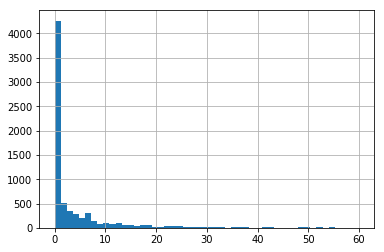

In [428]:
mtg_docs_df['n_model'].hist(range=[0, 60], bins=50)
print(mtg_docs_df['n_model'].median())

In [387]:
#mtg_docs_df.to_csv('docs_nmodel.csv')

In [391]:
mtg_docs_df.head()

,index,doc_link_text,doc_url,mtg_date,mtg_details_url,mtg_title,year,n_model
0,0,File,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,10.0
1,1,Algal Speciation Model and Calibration of Poto...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,12.0
2,2,Status of the Community Multiscale Air Quality...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,19.0
3,3,Contributions of Shore Erosion and Resuspensio...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,1.0
4,4,Chesapeake Bay Phase 5 Community Watershed Mod...,http://archive.chesapeakebay.net/pubs/calendar...,2008-01-08,https://www.chesapeakebay.net/what/event/model...,Modeling Subcommittee Quarterly Review,2008,10.0


In [405]:
mtg_docs_df.groupby('mtg_details_url').mean().sort_values('n_model', ascending = False).to_csv('most_model_mentions_mtgs_mean.csv')

In [417]:
d = {'year':'year', 'n_model':'n_model','mtg_date': 'mtg_date' }
df1=mtg_docs_df.groupby('mtg_details_url').agg({'year':'mean', 'n_model':'sum', 'mtg_date': 'max'}).rename(columns=d)

df1 = df1.sort_values('n_model', ascending = False)
df1.to_csv('most_model_mentions_mtgs_sum.csv')
#mtg_docs_df.groupby('mtg_details_url').sum().sort_values('n_model', ascending = False).to_csv('most_model_mentions_mtgs_sum.csv')

8.0


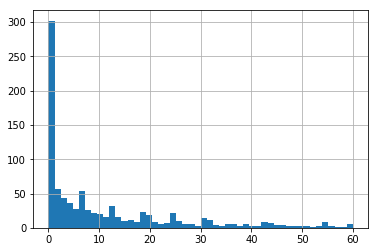

In [427]:
df1['n_model'].hist(range=[0, 60], bins=50)
print(df1['n_model'].median())

In [398]:
mtg_docs_df.groupby(['year']).mean().sort_values('n_model', ascending = False)

,index,n_model
year,,
2011,4.795904,7.061803
2012,5.454545,5.869113
2008,6.607429,5.505747
2009,6.600567,4.625928
2010,4.512890,3.857504


In [403]:
mtg_docs_df.sort_values('n_model', ascending = False)

,index,doc_link_text,doc_url,mtg_date,mtg_details_url,mtg_title,year,n_model
5030,14,The 2010 Chesapeake Bay Eutrophication Model -...,http://archive.chesapeakebay.net/pubs/calendar...,2011-01-12,https://www.chesapeakebay.net/what/event/model...,Modeling Team Quarterly Review,2011,674.0
5014,14,The 2010 Chesapeake Bay Eutrophication Model -...,http://archive.chesapeakebay.net/pubs/calendar...,2011-01-11,https://www.chesapeakebay.net/what/event/model...,Modeling Team Quarterly Review,2011,674.0
6094,5,STAC report,http://archive.chesapeakebay.net/pubs/calendar...,2011-09-27,https://www.chesapeakebay.net/what/event/manag...,Management Board meeting,2011,445.0
7319,2,2011 NAS Report ( pdf - 5.82 MB ),https://www.chesapeakebay.net/channel_files/18...,2012-06-21,https://www.chesapeakebay.net/what/event/model...,June Modeling Lab Action Team Meeting,2012,374.0
5934,6,Chesapeake Bay NAS Report- In Full,http://archive.chesapeakebay.net/pubs/calendar...,2011-07-26,https://www.chesapeakebay.net/what/event/agric...,Agriculture Workgroup Meeting,2011,373.0
5600,2,NAS Report,http://archive.chesapeakebay.net/pubs/calendar...,2011-05-19,https://www.chesapeakebay.net/what/event/cheap...,CheapeakeStat Action Team Meeting,2011,373.0
5859,1,NRC Chesapeake Bay Report,http://archive.chesapeakebay.net/pubs/calendar...,2011-07-14,https://www.chesapeakebay.net/what/event/tmaw_...,TMAW July Conference Call,2011,373.0
6413,8,(Attachment 7) Hydrodynamic Modeling ( pdf - 1...,https://www.chesapeakebay.net/channel_files/13...,2012-01-04,https://www.chesapeakebay.net/what/event/manag...,Management Board meeting,2012,288.0
4031,7,Nutrient Reduction on Virginia Farms,http://archive.chesapeakebay.net/pubs/calendar...,2010-04-27,https://www.chesapeakebay.net/what/event/agric...,Agriculture Workgroup Meeting,2010,213.0
8044,21,Minutes ( pdf - 540.85 KB ),https://www.chesapeakebay.net/channel_files/18...,2012-10-23,https://www.chesapeakebay.net/what/event/water...,Water Quality Goal Implementation Team Meeting...,2012,173.0
